In [1450]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl
import matplotlib as plt

In [1451]:
df = pd.read_csv('endgeneric.csv') 
df.head()

SMS_IN_CNT1  SMS_IN_CNT2  SMS_IN_CNT3  SMS_OUT_CNT1  SMS_OUT_CNT2  \
0          167          168          176             9             8   
1            5           10           17             0             0   
2          126          104          109             3             2   
3           92          117           83             6            14   
4          181          178          175             0             7   

   SMS_OUT_CNT3  CALLS_IN_CNT1  CALLS_IN_CNT2  CALLS_IN_CNT3  CALLS_OUT_CNT1  \
0             3            348            295            423             131   
1             0             58             31             26              25   
2             8            194            198             98             143   
3             5             80            100             95             104   
4             3            169            201            155             220   

    ...     RECHARGE1  RECHARGE2  RECHARGE3  RECHARGE_CNT1  RECHARGE_CNT2  \
0   ...         150.0      100.0      200.0              2              1   
1   ...           0.0        0.0        0.0              0              0   
2   ...         530.0      300.0      400.0              4              1   
3   ...         500.0      300.0      186.0              1              1   
4   ...         300.0      300.0      400.0              1              1   

   RECHARGE_CNT1.1  LIFE_TIME1  LIFE_TIME2  LIFE_TIME3  MNP_OUT  
0                2      5182.0      5213.0      5244.0        0  
1                0      5182.0      5213.0      5244.0        0  
2                2      5182.0      5213.0      5244.0        0  
3                1      5182.0      5213.0      5244.0        0  
4                1      5182.0      5213.0      5244.0        0  

[5 rows x 49 columns]

In [1452]:
outed_index0 = df[df.MNP_OUT == 0].index
sample_size = sum(df.MNP_OUT == 1)
random_indices0 = np.random.choice(outed_index0, 175*sample_size, replace=False)
sample0 = df.loc[random_indices0]
outed_index1 = df[df.MNP_OUT == 1].index
random_indices1 = np.random.choice(outed_index1, sample_size, replace=False)
sample1 = df.loc[random_indices1]
sample = pd.concat([sample0, sample1], ignore_index=True)

In [1453]:
# sample.drop(['SMS_IN_CNT1'], axis=1)
# sample.drop(['SMS_IN_CNT2'], axis=1)
# sample.drop(['SMS_IN_CNT3'], axis=1)
sample.drop(['SMS_OUT_CNT1'], axis=1)
sample.drop(['SMS_OUT_CNT2'], axis=1)
sample.drop(['SMS_OUT_CNT3'], axis=1)
# sample.drop(['CALLS_IN_CNT1'], axis=1)
# sample.drop(['CALLS_IN_CNT2'], axis=1)
# sample.drop(['CALLS_IN_CNT3'], axis=1)
# sample.drop(['CALLS_OUT_CNT1'], axis=1)
# sample.drop(['CALLS_OUT_CNT2'], axis=1)
# sample.drop(['CALLS_OUT_CNT3'], axis=1)
sample.drop(['DURATION_IN_MIN1'], axis=1)
sample.drop(['DURATION_IN_MIN2'], axis=1)
sample.drop(['DURATION_IN_MIN3'], axis=1)
sample.drop(['DURATION_OUT_MIN1'], axis=1)
sample.drop(['DURATION_OUT_MIN2'], axis=1)
# sample.drop(['DURATION_OUT_MIN3'], axis=1)
# sample.drop(['DATA_TRAFFIC_MB1'], axis=1)
# sample.drop(['DATA_TRAFFIC_MB2'], axis=1)
# sample.drop(['DATA_TRAFFIC_MB3'], axis=1)
# sample.drop(['SIM_LTE1'], axis=1)
# sample.drop(['SIM_LTE2'], axis=1)
# sample.drop(['SIM_LTE3'], axis=1)
sample.drop(['TARIFF_ID1'], axis=1)
sample.drop(['TARIFF_ID2'], axis=1)
sample.drop(['TARIFF_ID3'], axis=1)
# sample.drop(['SUPPORT_3G1'], axis=1)
# sample.drop(['SUPPORT_3G2'], axis=1)
# sample.drop(['SUPPORT_3G3'], axis=1)
# sample.drop(['SUPPORT_4G1'], axis=1)
# sample.drop(['SUPPORT_4G2'], axis=1)
# sample.drop(['SUPPORT_4G3'], axis=1)
sample.drop(['SUBS_HOME_REGION_ID1'], axis=1)
sample.drop(['SUBS_HOME_REGION_ID2'], axis=1)
sample.drop(['SUBS_HOME_REGION_ID3'], axis=1)
sample.drop(['CHARGE1'], axis=1)
sample.drop(['CHARGE2'], axis=1)
sample.drop(['CHARGE3'], axis=1)
sample.drop(['RECHARGE1'], axis=1)
sample.drop(['RECHARGE2'], axis=1)
sample.drop(['RECHARGE3'], axis=1)
# sample.drop(['RECHARGE_CNT1'], axis=1)
# sample.drop(['RECHARGE_CNT2'], axis=1)
# sample.drop(['RECHARGE_CNT1.1'], axis=1)
sample.drop(['LIFE_TIME1'], axis=1)
sample.drop(['LIFE_TIME2'], axis=1)
sample.drop(['LIFE_TIME3'], axis=1)

SMS_IN_CNT1  SMS_IN_CNT2  SMS_IN_CNT3  SMS_OUT_CNT1  SMS_OUT_CNT2  \
0               36           73           51             5             4   
1               36           65           19             0             0   
2               18           76           51             0             0   
3                8            3            0             0             0   
4               12           20           17             0             0   
5               78          108           76             5             2   
6               74          109           83             0             0   
7              298          296          297             6             1   
8              212          257          236             5            17   
9              205          189          214            22            23   
10               3            3            0             0             0   
11               7            4            3             0             0   
12               5           19            3             0             0   
13             144          134          139           180            14   
14              23           44           31             0             1   
15             173          276          226            11            30   
16             249          194          114            13             8   
17              58           50           72             3             0   
18             136          209           89            52            26   
19              10            5            2             1             0   
20             150          151          109             4             5   
21             140          133          170             1             9   
22             262          266          193            41            37   
23              89           81           81             1             0   
24              20           15           13             0             0   
25             220          235          167            11             2   
26             242          261          220            19             7   
27             164          214          302            42            25   
28              75           93          106             4             7   
29              12           20           11             0             0   
...            ...          ...          ...           ...           ...   
43442          134          175          175             2             0   
43443          154          142          121            19            18   
43444           26           39           29             0             2   
43445          118           98          122            25            29   
43446          218          122          116             2             1   
43447          250          163          277            41            31   
43448          249          316          221             8            10   
43449          160          194          118            14             5   
43450          347          663          515            52            30   
43451          364          352          216            34            23   
43452          252          289          200            31            30   
43453          148          357          356             0             3   
43454          190          129          184             2             0   
43455          138          133          105             0             3   
43456           38           31           23             0             1   
43457           95           46           81             4             2   
43458          240          125          111            51            15   
43459          257          173          204            26             6   
43460          491          483          469            34            41   
43461           58           85           58             2             5   
43462          127          161          174           

In [1454]:
target = sample.MNP_OUT
train = sample.drop(['MNP_OUT'], axis=1) 
#из исходных данных убираем Id пассажира и флаг спасся он или нет
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [1455]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = cross_validation.train_test_split(train, target, test_size=0.25)

In [1456]:
model_lr = LogisticRegression(penalty='l1', tol=0.01, class_weight = 'balanced', C = 0.01) 

In [1457]:
scores = cross_validation.cross_val_score(model_lr, train, target, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()

In [1458]:
pl.clf()
pl.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

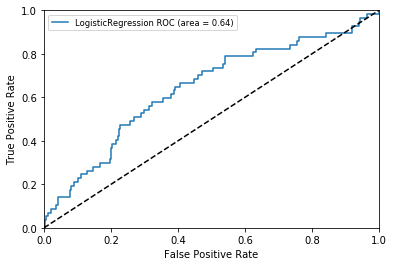

In [1459]:
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [ ]:
# Генерируем описание модели в формате json
model_json = model_lr.to_json()
# Записываем модель в файл
json_file = open("hack_modelSki.json", "w")
json_file.write(model_json)
json_file.close()
#Сохранение весов
model_lr.save_weights("hack_weightsSki.h5")

In [ ]:
import pickle
# save the model to disk
filename = 'hack_modelSki74.sav'
pickle.dump(model_lr, open(filename, 'wb'))

# some time later...


